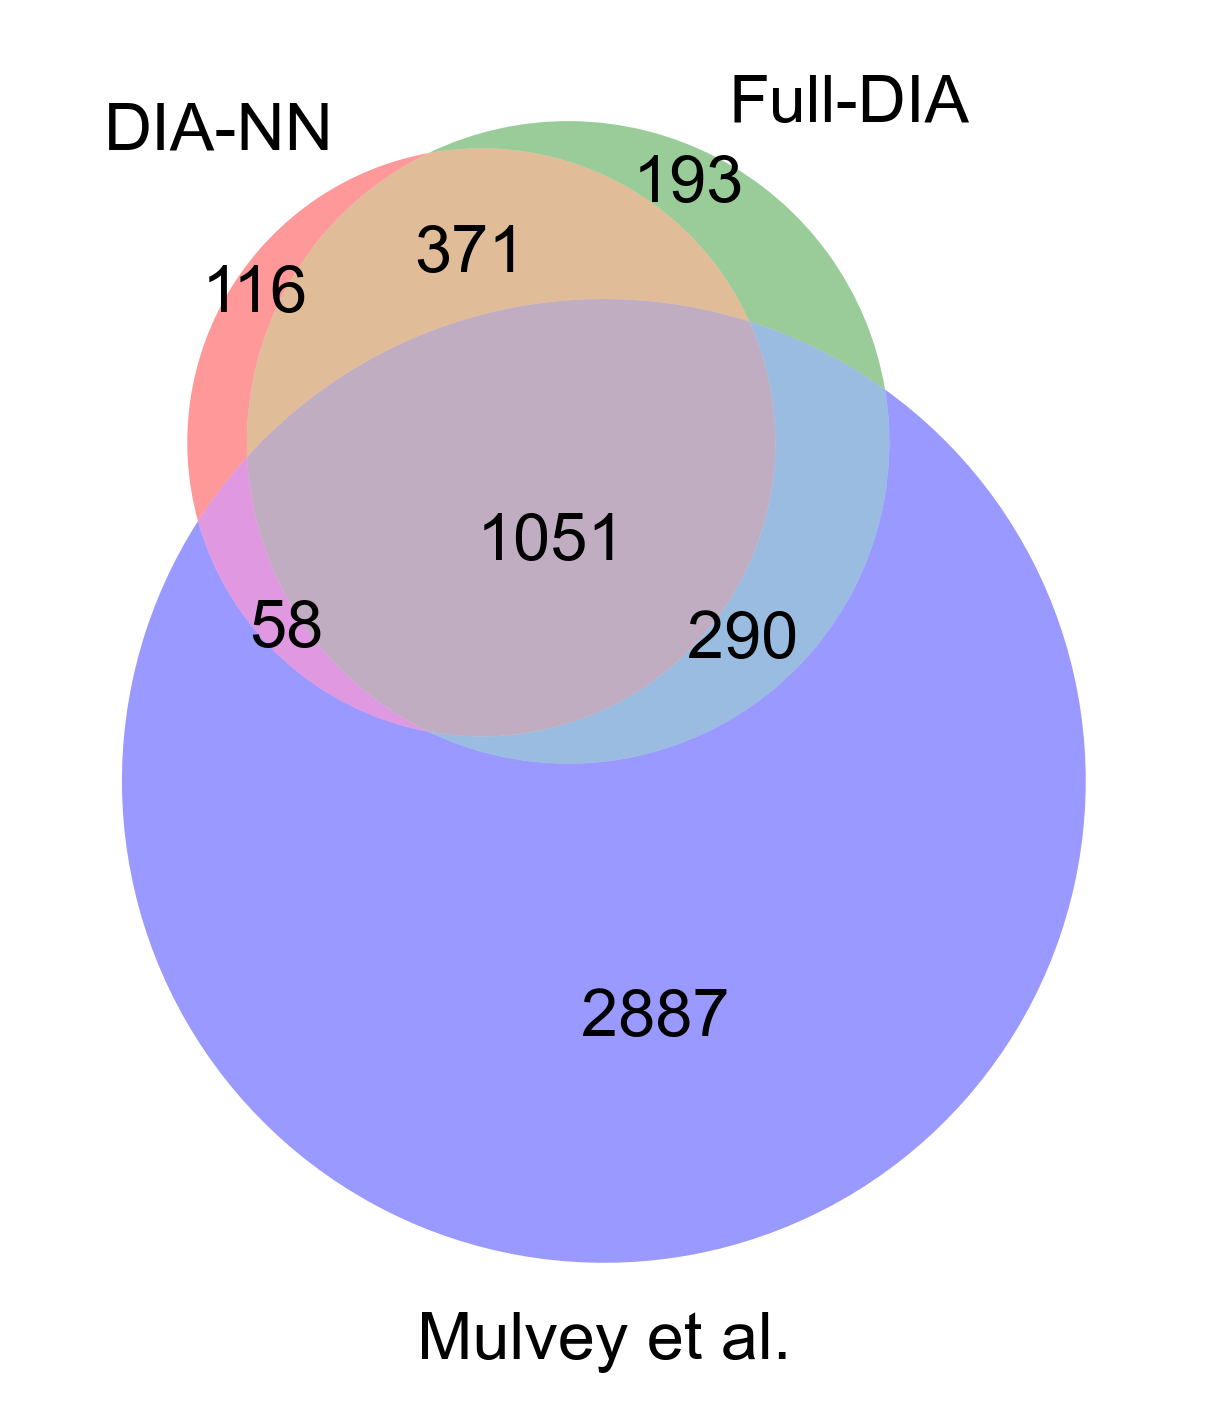

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

plt.style.use('default')
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'Arial'

report_dir = Path('../../reports/SC-LPS')

df_big = pd.read_csv(report_dir/'meta'/'Mulvey et al.tsv', sep='\t')
proteins = set(df_big['ID'].str.split('-').str[0])

df = pd.read_parquet(report_dir/'diann_220'/'report.parquet', engine='fastparquet')
pgs_diann = set(df[df['Global.PG.Q.Value'] < 0.01]['Protein.Group'])

df = pd.read_parquet(report_dir/'full_100'/'report.parquet')
pgs_full = set(df[(df['Global.PG.Q.Value'] < 0.01)]['Protein.Group'])

v = venn3([pgs_diann, pgs_full, proteins], ['DIA-NN', 'Full-DIA', 'Mulvey et al.'])
for t in v.set_labels + v.subset_labels:
    if t: t.set_fontsize(16)
plt.tight_layout()
plt.show()

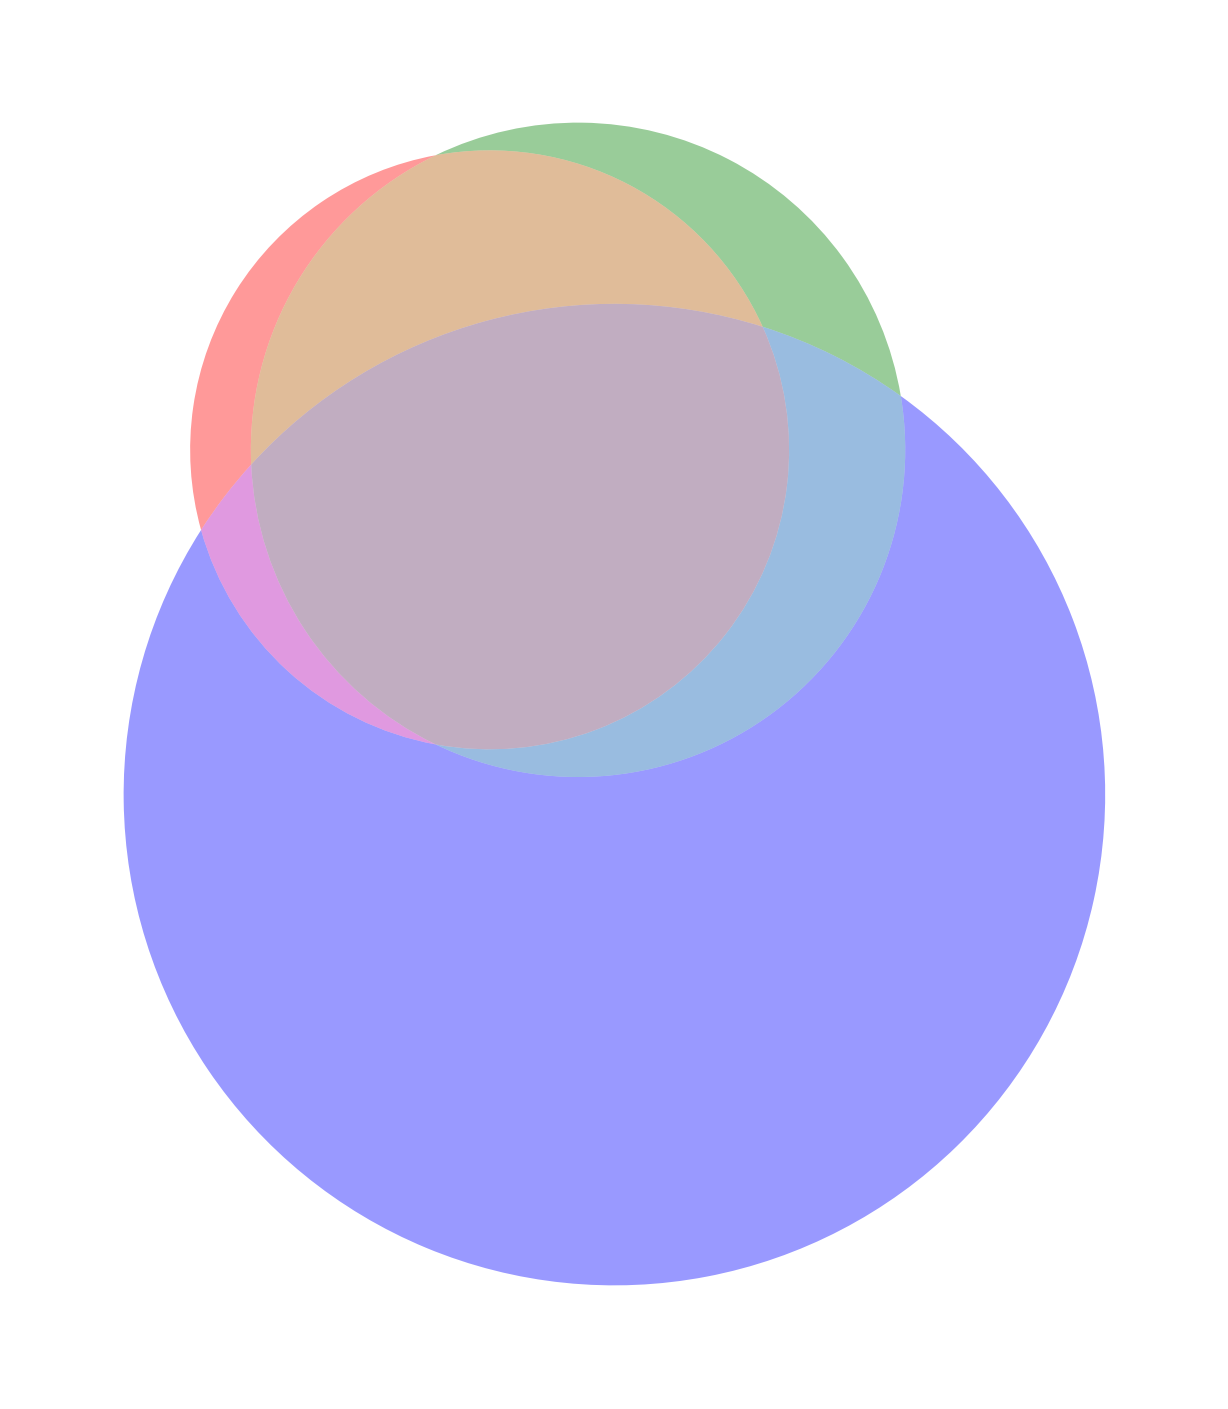

In [2]:
v = venn3([pgs_diann, pgs_full, proteins], ['DIA-NN', 'Full-DIA', 'Mulvey et al.'])

for label in v.subset_labels:
    if label:
        label.set_visible(False)
for label in v.set_labels:
    if label:
        label.set_visible(False)
plt.tight_layout()
plt.show()